# HPC workflow

This notebook introduces the flower CLI (command line interface), which according to flower is the preferred method for running simulations. Using this, we can submit job scripts on the DTU HPC.

First, clone the FedLearning-Final repo to the HPC. Then, we will need to set up a virtual environment on the HPC. Navigate to the FedLearning-Final directory on the HPC, then type the following in the terminal:

```
module load python3/3.11.11
python3 -m venv .venv
```
Once that is done, activate the virtual environment with
```
source .venv/bin/activate
```
Now we are ready to install the necessary packages:
```
python3 -m pip install numpy 
python3 -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
python3 -m pip install "flwr[simulation]" "flwr-datasets[vision]"
```

With this completed, 

In [16]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
logdir = Path().cwd().parent / "logs" / "lsf"
file_name = "combined_history.csv"
file_path = logdir / file_name

In [19]:
df = pd.read_csv(file_path)

df_scaffold = df[df["method"] == "scaffold"]
df_scaffold = df_scaffold[df_scaffold["supernodes"] == 10]

df[(df["round"] == 50) & (df["rounds"] == 50)]

,round,accuracy,method,supernodes,fraction,rounds,partition,job_index
50,50,0.6910,fedavg,10,1.0,50,iid,1
101,50,0.6849,fedavg,10,1.0,50,dirichlet,2
152,50,0.5264,fedavg,10,1.0,50,shard,3
506,50,0.7095,scaffold,10,1.0,50,iid,7
557,50,0.7010,scaffold,10,1.0,50,dirichlet,8
608,50,0.4884,scaffold,10,1.0,50,shard,9


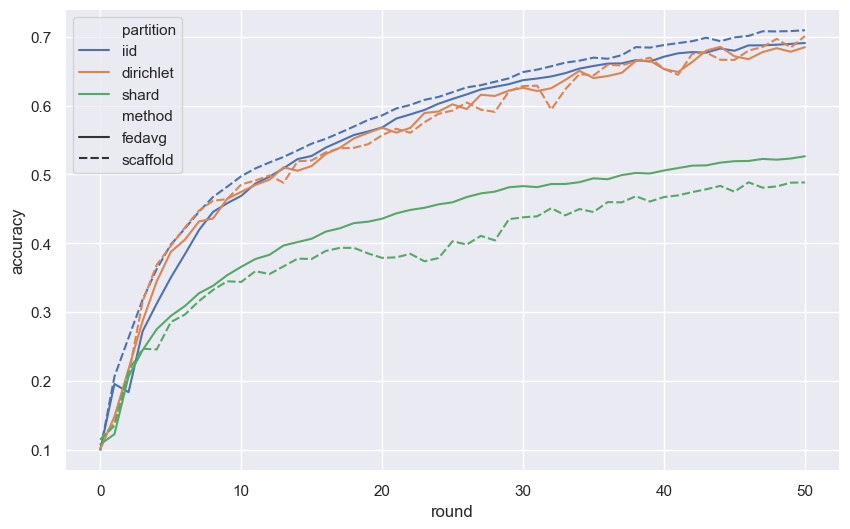

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    ax=ax,
    data=df[df["rounds"] == 50],
    x="round",
    y="accuracy",
    hue="partition",
    style="method",)

plt.show()

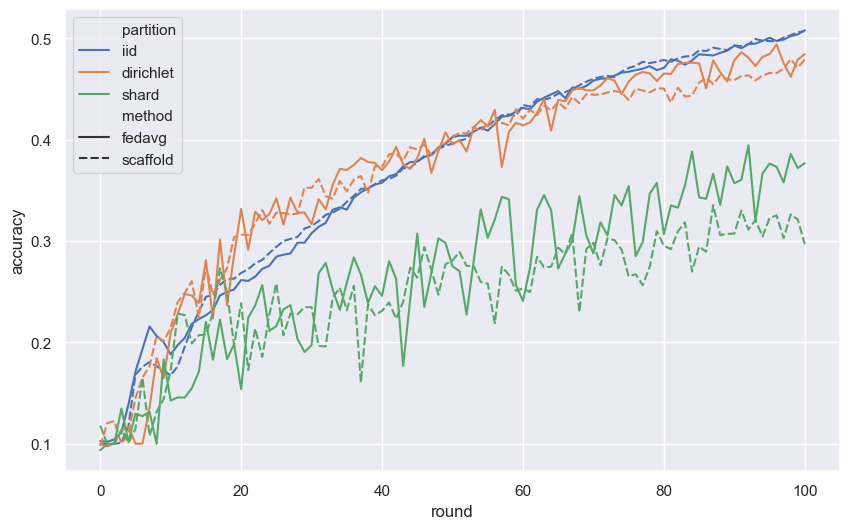

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    ax=ax,
    data=df[df["rounds"] == 100],
    x="round",
    y="accuracy",
    hue="partition",
    style="method",)

plt.show()